# AI2 - EXPLORATORY DATA ANALYST
## Description:
### 1. Dataset:

Heart Attack Analysis & Prediction Dataset:

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### 2. Columns Description (Given by Kaggle):
- Age : Age of the patient

- Sex : Sex of the patient

- exng: exercise induced angina (1 = yes; 0 = no)

- caa: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

      Value 1: typical angina
      Value 2: atypical angina
      Value 3: non-anginal pain
      Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results
      Value 0: normal
      Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalachh : maximum heart rate achieved

- oldpeak: Previous peak

- slp: slope

- thall: Thal rate

- output : 0= less chance of heart attack 1= more chance of heart attack



## Step 0. Load the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')


## Step 1. Understand the dataset structure & Distinguish Attributes


In [19]:
# Check the dataset size
df.shape

(303, 14)

In [18]:
# Check the first 5 rows
df.head(5)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Check the data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [14]:
# Get the summary statistics
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
# Check if exists null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [26]:
# Identify numeric columns and non-numeric columns
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
non_numerical_features = df.select_dtypes(exclude=['number']).columns.tolist()

In [22]:
numerical_features

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [28]:
non_numerical_features

[]

In [64]:
from os import name
# categorize continuous features and categorical features
# Here I treat categorical features as features that only have <= 5 different values
unique_threshold = 5
continuous_features = [col for col in numerical_features if df[col].nunique() > unique_threshold]
categorical_features = [col for col in numerical_features if col != 'output' and df[col].nunique() <= unique_threshold]

target_column = 'output'

In [51]:
continuous_features

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [52]:
categorical_features

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [65]:
target_column

'output'

## Step 2. Univariate Analysis
### Analyze each feature independently to understand their distributions and basic statistics.

In [20]:
import seaborn as sns

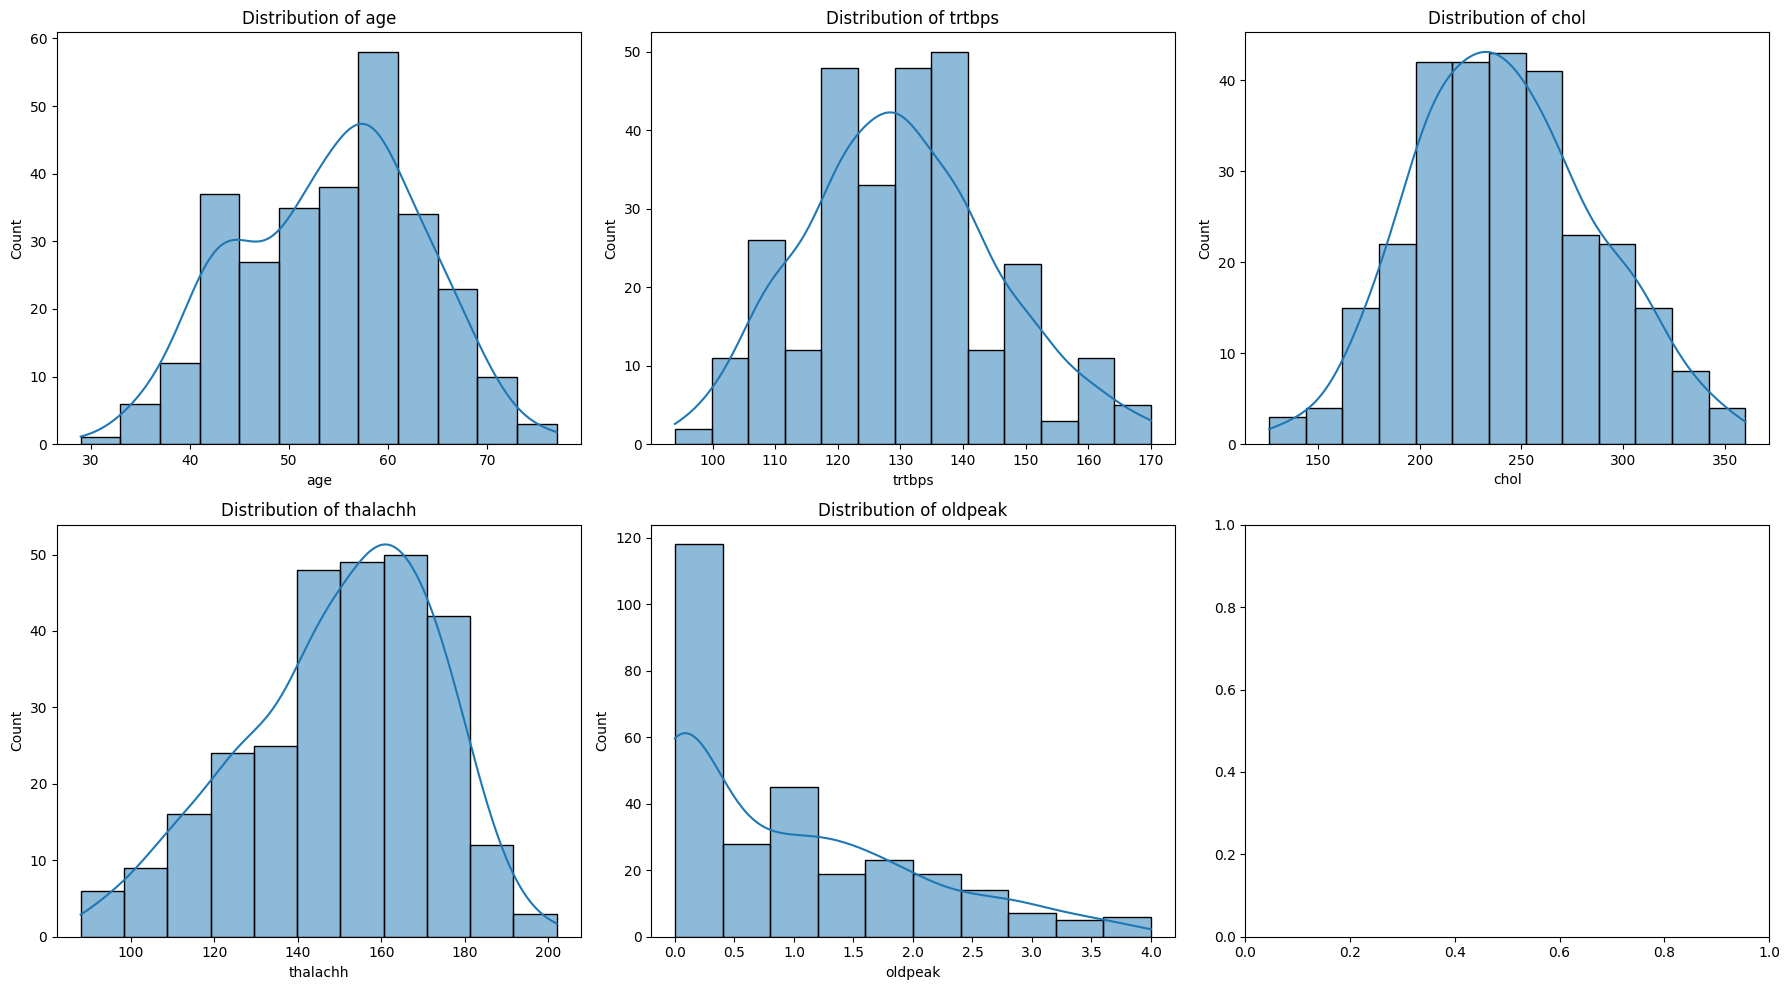

In [81]:
# For continuos features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, feature in enumerate(continuous_features):
    row = i // 3
    col = i % 3
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

**Summary:**

Đối với các thuộc tính liên tục, tôi sử dụng histogram để trực quan hóa tần suất xuất hiện của các giá trị trong từng khoảng nhất định, từ đó có thể nhận biết sơ bộ về phân phối của dữ liệu.

Sau khi vẽ các histogram cho các thuộc tính "age", "trtbps", "chol", và "thalachh", tôi nhận thấy rằng phân phối của các biểu đồ này đều có dạng hình chuông (bell-shaped - đối xứng và tập trung tại mean), có phân phối rất gần với phân phối chuẩn (normal distribution). Như vậy, có thể thấy dữ liệu trong dataset được lấy một cách ngẫu nhiên trong population lớn.

Riêng với thuộc tính oldpeak, phân phối không có dạng chuông, mà khá giống phân phối mũ, mà phân phối mũ liên quan đến những sự kiện hiếm gặp, chứng tỏ là thuộc tính oldpeak có thể là ngẫu nhiên ở các bệnh nhân và không phản ánh nhiều về kết quả dự đoán chung về output nguy cơ bị heart attack.

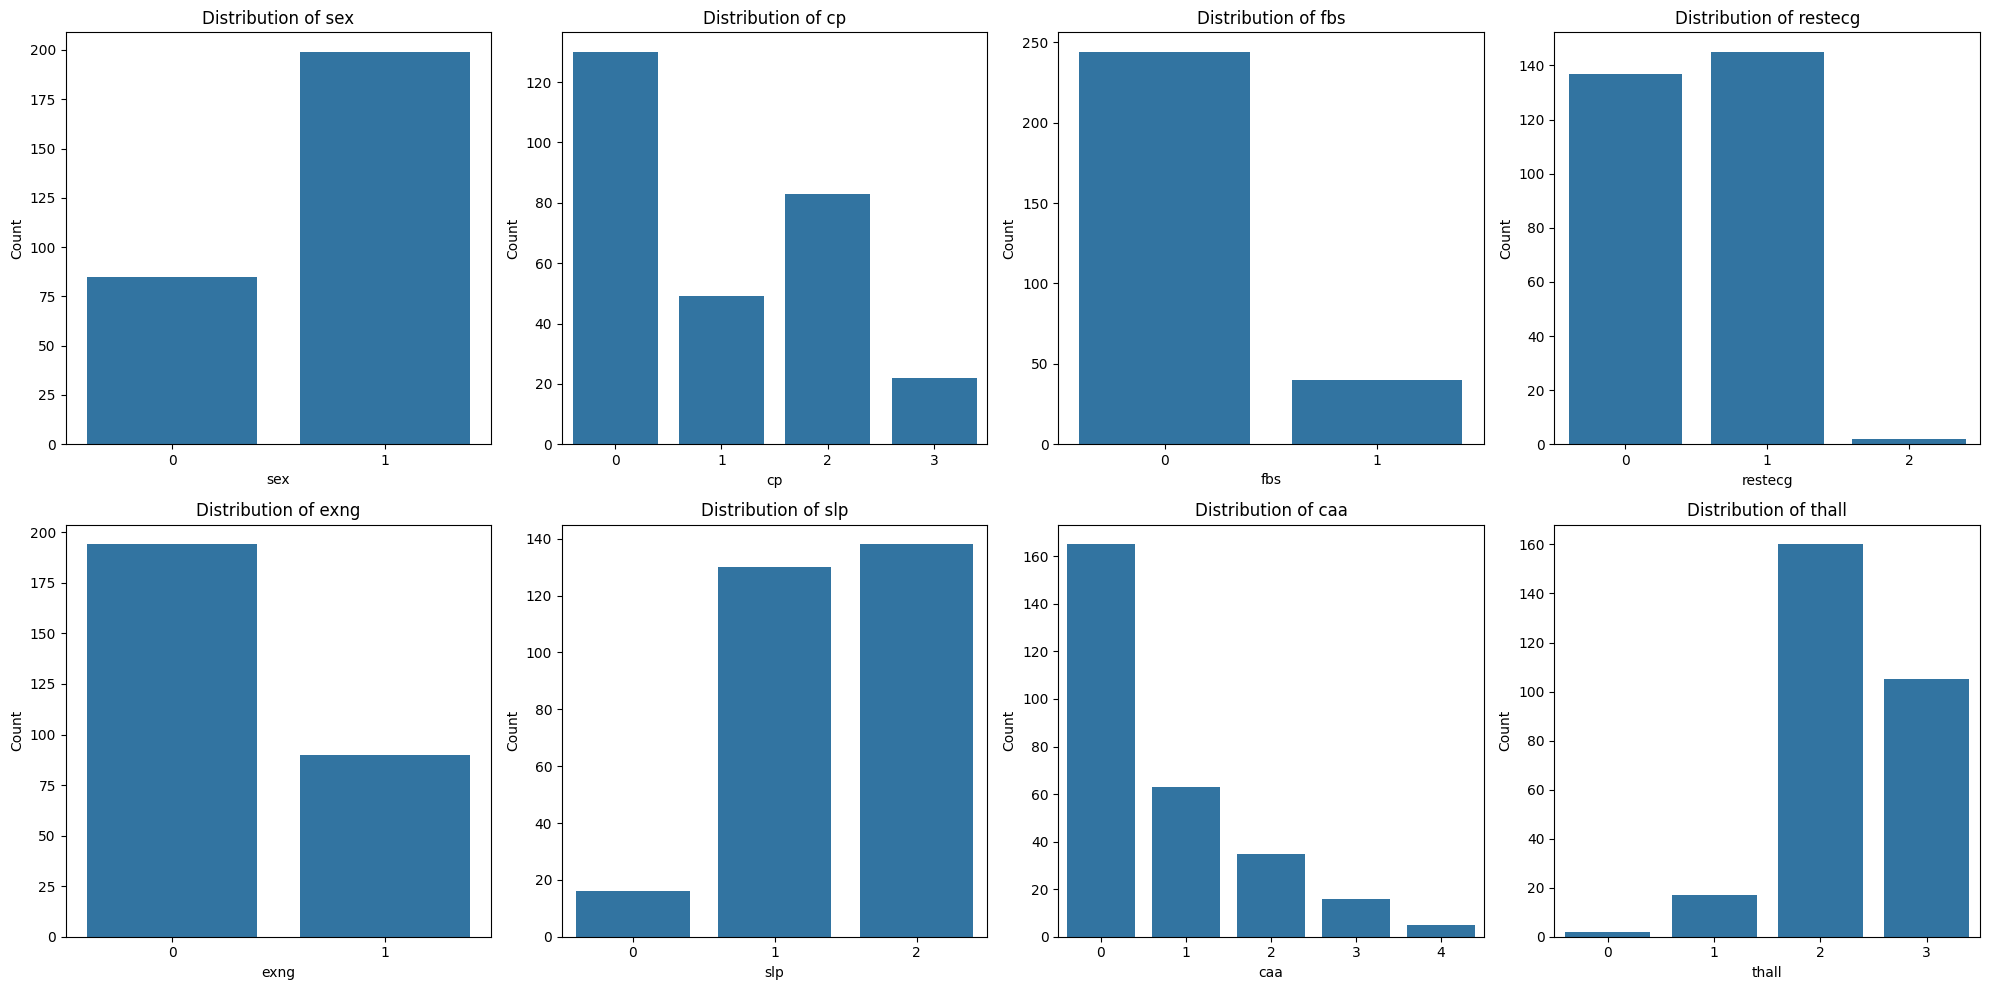

In [82]:
# For categorical features
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(categorical_features):
    row = i // 4
    col = i % 4
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Summary**:

Đối với univariate analysis cho các thuộc tính mang tính chất phân loại, tôi sử dụng biểu đồ cột để theo dõi số lượng dữ liệu ở mỗi loại trong các phân loại đó.

Có thể nhận xét sơ bộ:

Dữ liệu thiên về khảo sát những người có giới tính 1.

Về các chỉ số sức khỏe, tập dữ liệu đa số khảo sát những nguời có chỉ số sức khỏe ổn với ít hoặc không có triệu chứng của đau tim trước đó (đa số ít cơn đau ngực, mỡ máu < 120 mg/l, exng = 0, caa = 0)

## Step 3.1 Bivariate Analysis
Examine the relationship between pairs of features, especially between the target variable (output) and other features.

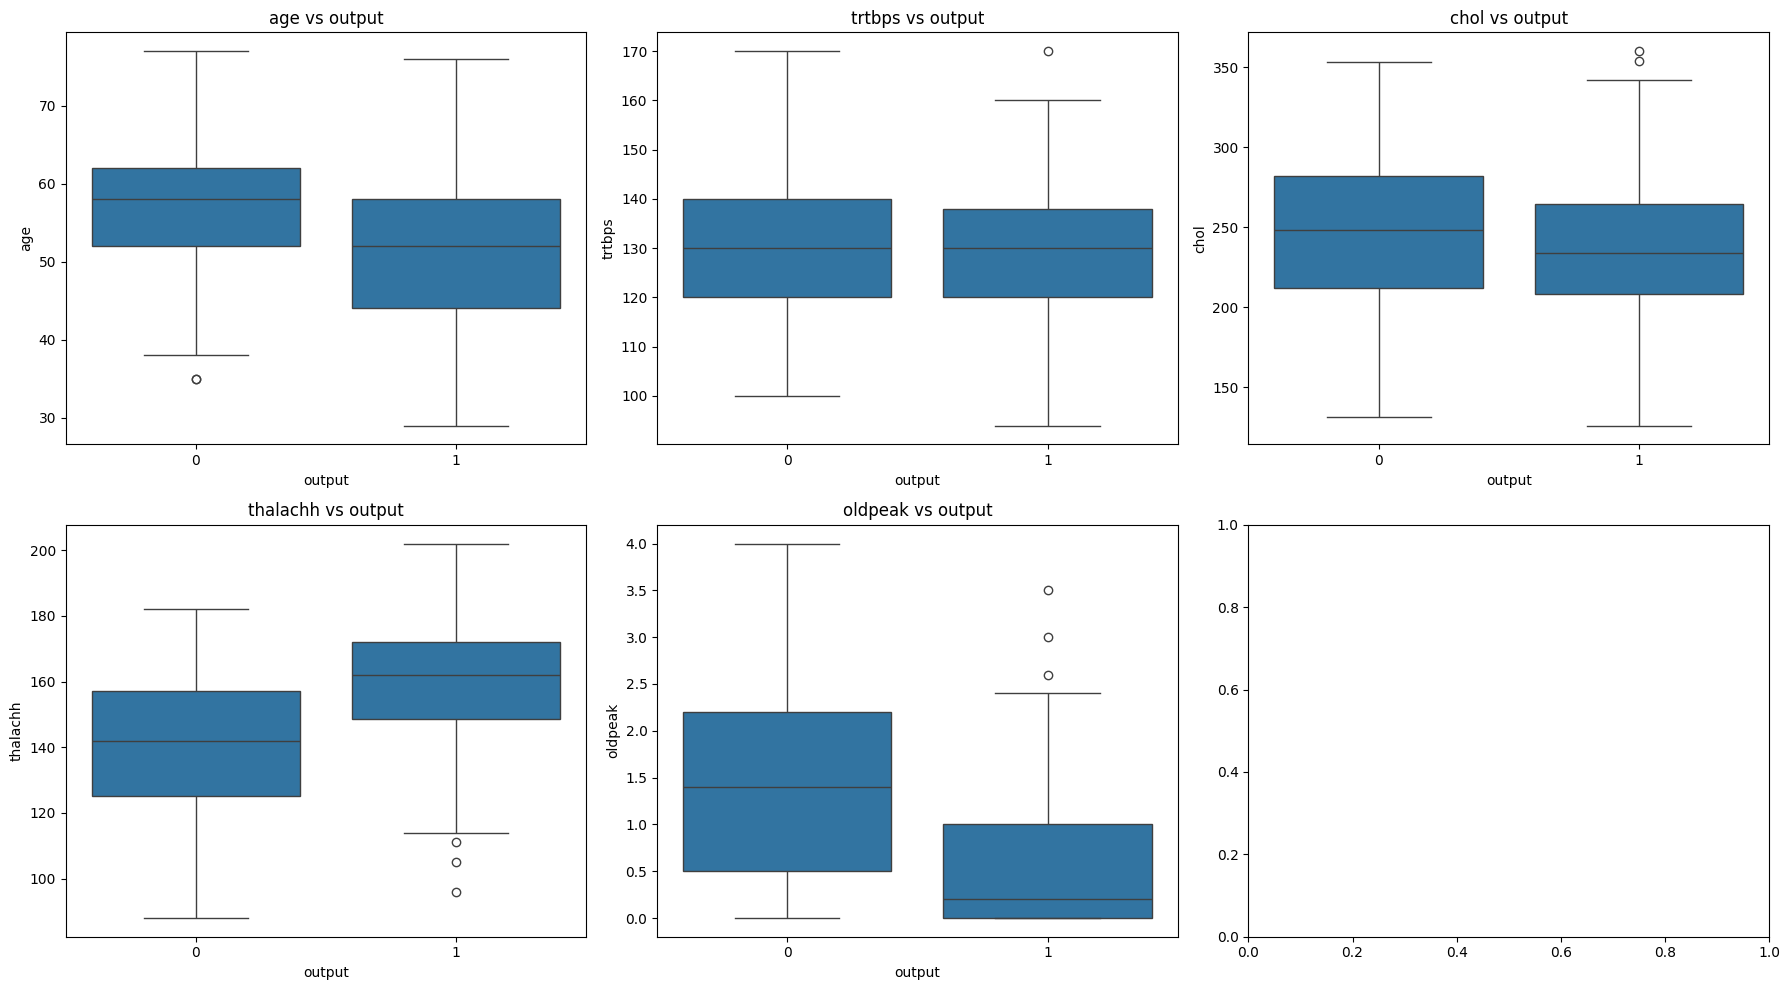

In [86]:
# Boxplots for numerical features vs target
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, feature in enumerate(continuous_features):
    row = i // 3
    col = i % 3
    sns.boxplot(x=target_column, y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs {target_column}')
    axes[row, col].set_xlabel(target_column)
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()


Summary:
Tôi sử dụng biểu đồ hộp để thực hiện bivariate statistics từng continuous feature với output để xem xét là ở khoảng giá trị nào của feature thì output = 1 (bị heart attack) và xảy ra với output = 0 (không bị heart attack) , nhận diện mối tương quan giữa từng feature với output

Qua đó, tôi đưa ra nhận xét:
- Về độ tuổi, dữ liệu phân bố nhiều ở cả output 0 và 1, cho thấy tuổi tác không thể hiện rõ nguy cơ bị đau tim. Mọi độ tuổi từ gần 30 trở lên đều có thể bị, nhưng dữ liệu người có hơn 1 lần bị heart attack đã tập trung nhiều ở độ tuổi trung niên, 40-60 tuổi.
- Huyết áp nghỉ không quá ảnh hưởng đến nguy cơ đau tim
- Cholesterol cũng không phản ánh nhiều nguy cơ đau tim
- thalach ( tần số tim tối đa ) càng cao, càng có nguy cơ bị đau tim
- oldpeak càng thấp, càng có nguy cơ bị đau tim

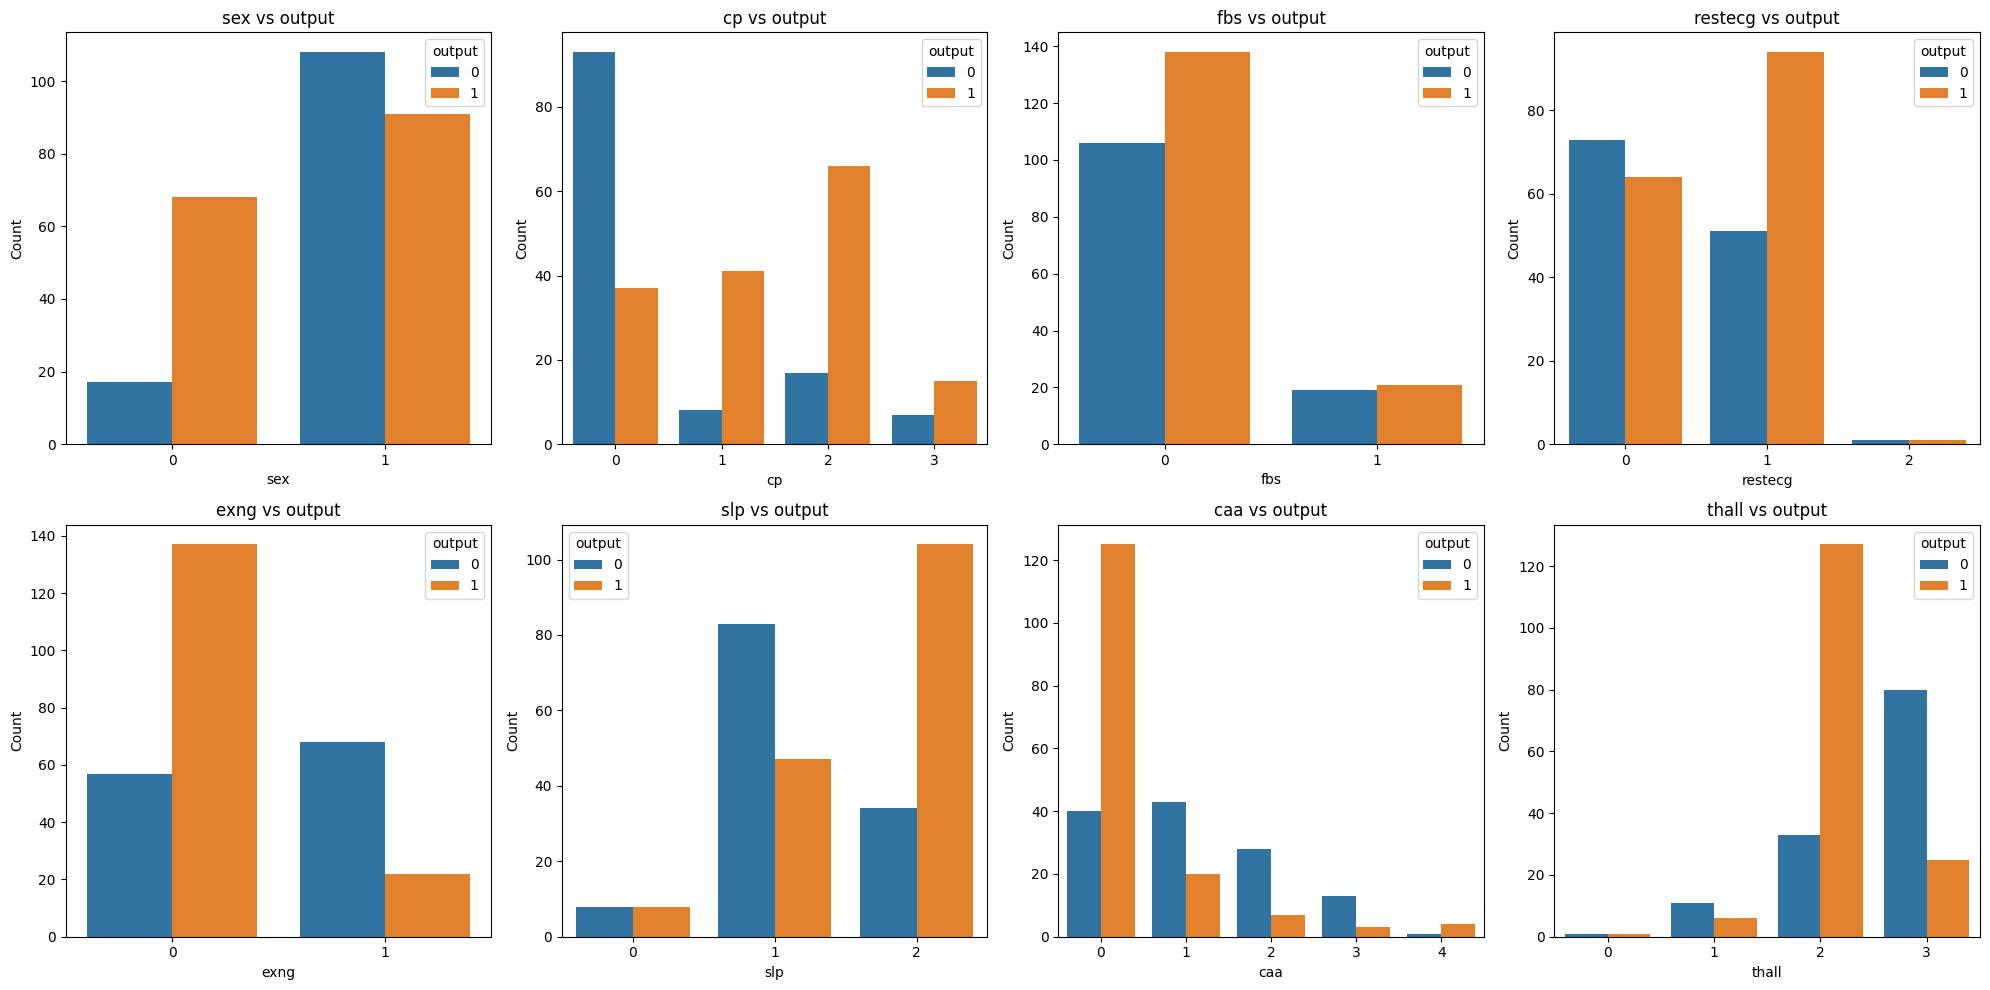

In [79]:
# Count plots for categorical features vs target
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(categorical_features):
    row = i // 4
    col = i % 4
    sns.countplot(x=feature, hue=target_column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs {target_column}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


Summary: Đối với thuộc tính phân loại, tôi sử dụng count plot để thống kê theo từng giá trị phân loại của từng feature, có bao nhiêu dữ liệu có output là 1 (mắc bệnh tim) và 0 (ko mắc bệnh tim), để xem mối liên hệ giữa nguy cơ mắc bệnh tim và mỗi feature.

Nhận xét sơ bộ

Tất cả các biến đều có liên quan đến nguy cơ mắc bệnh tim. Tuy nhiên, mức độ liên quan của từng biến khác nhau.

Các biến có liên quan nhất:

- Giới tính (sex) là nữ hay nam đều có tỉ lệ cao mắc bệnh tim, tuy nhiên trong các dữ liệu sex = 0 thì tỉ lệ mắc bệnh tim áp đảo.

- Huyết áp ( liên quan các chỉ số cp, exng), Điện tâm đồ (restecg), Đường huyết(fbs) càng cao càng có nguy cơ mắc đau tim.

## Step 3.2. Multivariate Statistics

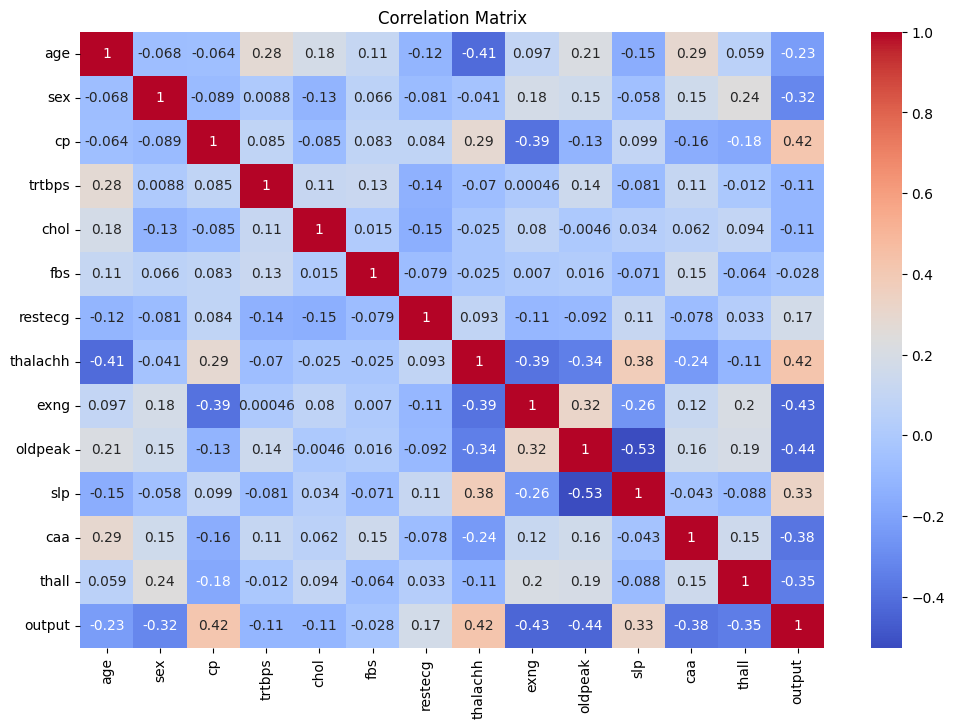

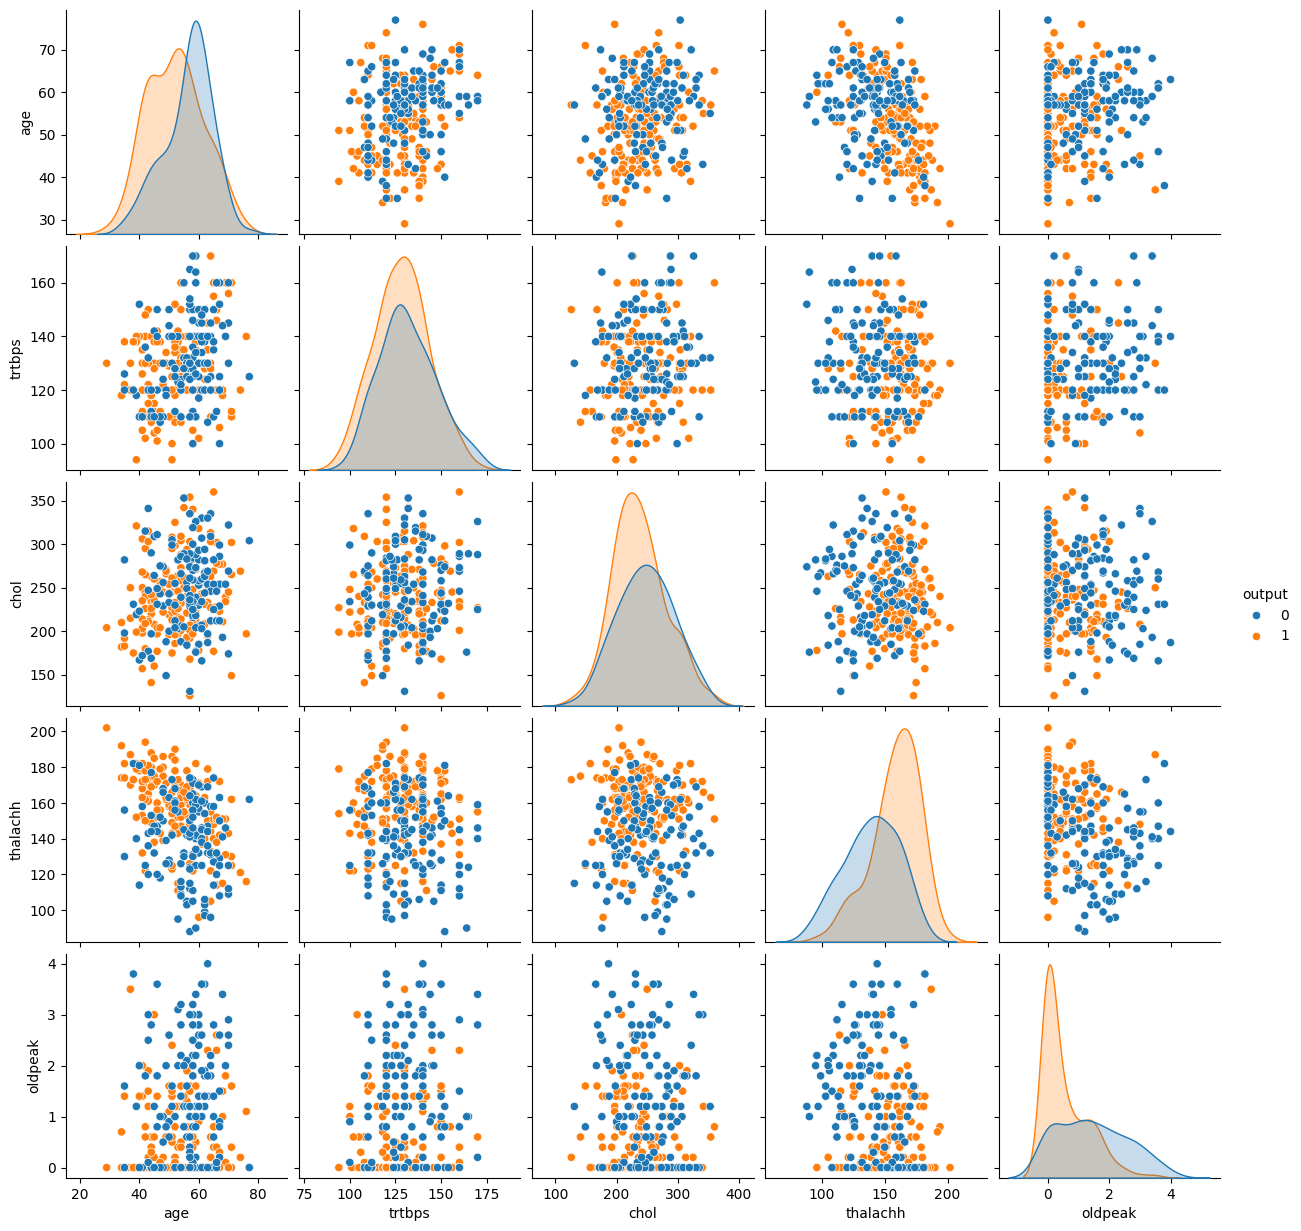

In [87]:
# Heatmap of correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features colored by target
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', target_column]], hue=target_column)
plt.show()


Summary:

Heatmap:

- Heatmap cung cấp một cái nhìn tổng quan về các mối quan hệ tuyến tính giữa tất cả các cột trong dữ liệu.

- Giá trị hệ số tương quan:

  + Từ -1 đến 0: Biểu thị mối quan hệ tiêu cực. Khi giá trị càng gần -1, mối quan hệ càng mạnh và hai biến có xu hướng thay đổi theo hướng ngược nhau.

  + Từ 0 đến 1: Biểu thị mối quan hệ tích cực. Khi giá trị càng gần 1, mối quan hệ càng mạnh và hai biến có xu hướng thay đổi theo cùng hướng.

  + 0: Biểu thị không có mối quan hệ tuyến tính giữa hai biến.

Pair plot:

- Mỗi ô trong ma trận biểu thị mối quan hệ giữa hai biến cụ thể.
- Biểu đồ cặp, còn được gọi là ma trận biểu đồ phân tán, là một ma trận đồ thị cho phép hiển thị trực quan mối quan hệ giữa từng cặp biến trong tập dữ liệu.
- Nó kết hợp cả biểu đồ và biểu đồ phân tán, cung cấp cái nhìn tổng quan độc đáo về sự phân bổ và mối tương quan của tập dữ liệu.
- Mục đích chính của biểu đồ cặp là đơn giản hóa các giai đoạn phân tích dữ liệu ban đầu bằng cách cung cấp ảnh chụp nhanh toàn diện về các mối quan hệ tiềm năng trong dữ liệu.







 ## Step 4. Detect Abberant And Missing Values
 Because in step 1, I found no missing values in this dataset, so this step can be skip in this scenario.

## Step 5. Detect Outliers

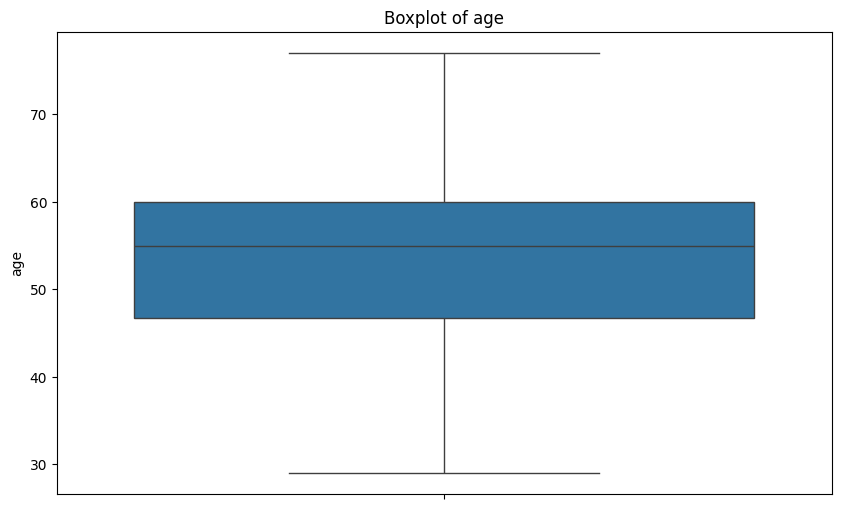

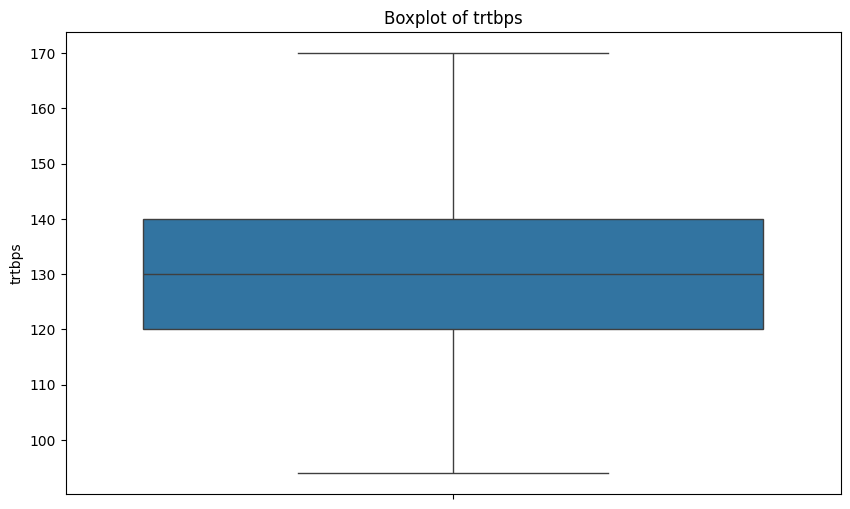

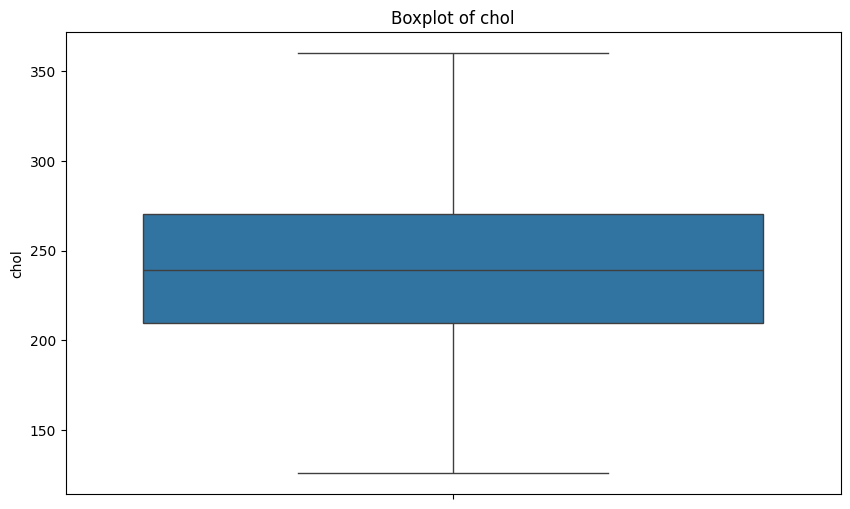

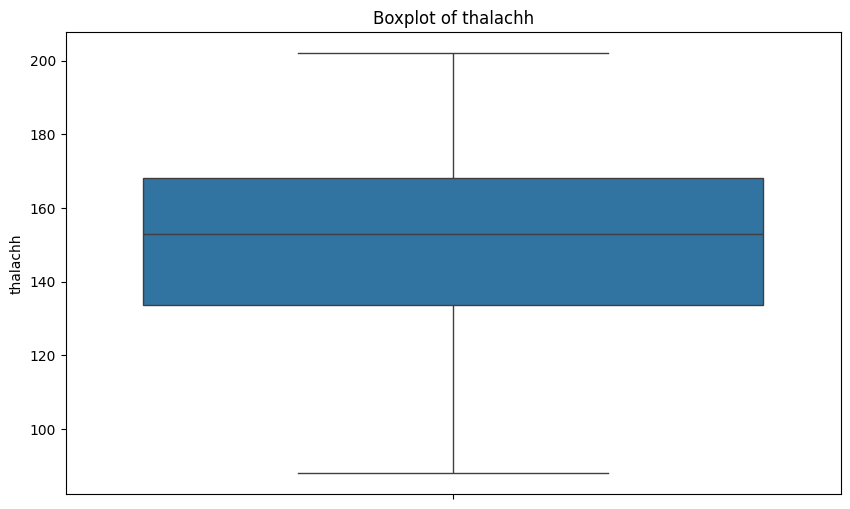

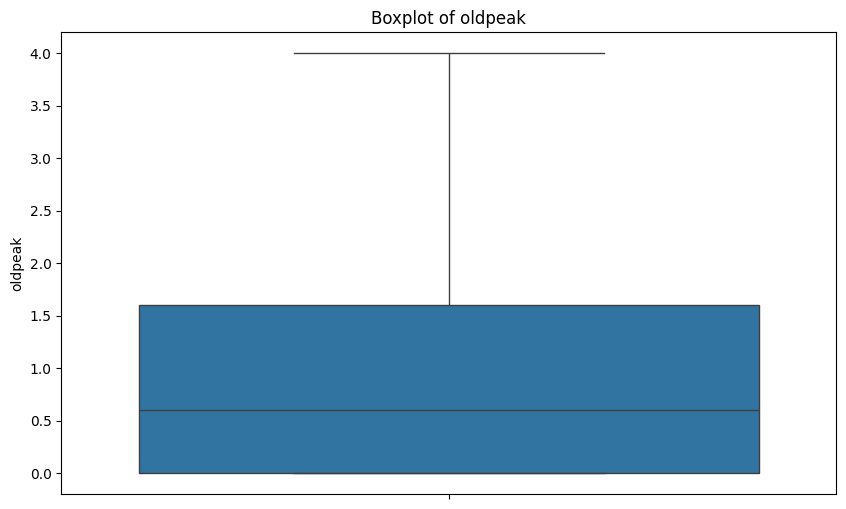

In [76]:
# Boxplot for outlier detection in continuous features
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [75]:
# Remove outliers
for feature in continuous_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]

## Conclusions:

- Dữ liệu tập trung vào nam giới, với đa số người có ít hoặc không có triệu chứng tim mạch trước đó.
- Phân phối của các thuộc tính liên tục "age", "trtbps", "chol" và "thalachh" gần với phân phối chuẩn, cho thấy dữ liệu được lấy ngẫu nhiên.
- Tuổi tác không thể hiện rõ nguy cơ bị đau tim. Tuy nhiên, dữ liệu người có hơn 1 lần bị heart attack đã tập trung nhiều ở độ tuổi trung niên, 40-60 tuổi.
- Huyết áp nghỉ và cholesterol không ảnh hưởng nhiều đến nguy cơ đau tim.
- Tần số tim tối đa (thalach), huyết áp (cp, exng), điện tâm đồ (restecg) và đường huyết (fbs) càng cao, càng có nguy cơ bị đau tim.